# Explanatory Data Visualization
The dataset we'll use describes Euro daily exchange rates between 1999 and 2021. The euro (symbolized with €) is the official currency in most of the countries of the European Union.[Kaggle Data](https://www.kaggle.com/datasets/lsind18/euro-exchange-daily-rates-19992020)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime

In [2]:
ex_rates=pd.read_csv('euro-daily-hist_1999_2020.csv')
ex_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

In [3]:
ex_rates.head()

,Period\Unit:,[Australian dollar ],[Bulgarian lev ],[Brazilian real ],[Canadian dollar ],[Swiss franc ],[Chinese yuan renminbi ],[Cypriot pound ],[Czech koruna ],[Danish krone ],...,[Romanian leu ],[Russian rouble ],[Swedish krona ],[Singapore dollar ],[Slovenian tolar ],[Slovak koruna ],[Thai baht ],[Turkish lira ],[US dollar ],[South African rand ]
0,2021-01-08,1.5758,1.9558,6.5748,1.5543,1.0827,7.9184,NaN,26.163,7.4369,...,4.8708,90.8000,10.0510,1.6228,NaN,NaN,36.8480,9.0146,1.2250,18.7212
1,2021-01-07,1.5836,1.9558,6.5172,1.5601,1.0833,7.9392,NaN,26.147,7.4392,...,4.8712,91.2000,10.0575,1.6253,NaN,NaN,36.8590,8.9987,1.2276,18.7919
2,2021-01-06,1.5824,1.9558,6.5119,1.5640,1.0821,7.9653,NaN,26.145,7.4393,...,4.8720,90.8175,10.0653,1.6246,NaN,NaN,36.9210,9.0554,1.2338,18.5123
3,2021-01-05,1.5927,1.9558,6.5517,1.5651,1.0803,7.9315,NaN,26.227,7.4387,...,4.8721,91.6715,10.0570,1.6180,NaN,NaN,36.7760,9.0694,1.2271,18.4194
4,2021-01-04,1.5928,1.9558,6.3241,1.5621,1.0811,7.9484,NaN,26.141,7.4379,...,4.8713,90.3420,10.0895,1.6198,NaN,NaN,36.7280,9.0579,1.2296,17.9214


#### Data Cleaning

In [4]:
# Change the columns name
new_columns=[]
for column in ex_rates.columns:
    new_columns.append(column.replace('[','').replace(']',''))
ex_rates.columns=new_columns
ex_rates.rename(columns={'Period\\Unit:': 'Time'},
                      inplace=True)
ex_rates['Time'] = pd.to_datetime(ex_rates['Time'])
ex_rates.sort_values('Time', inplace=True)
ex_rates.reset_index(drop=True, inplace=True)
ex_rates.head()

,Time,Australian dollar,Bulgarian lev,Brazilian real,Canadian dollar,Swiss franc,Chinese yuan renminbi,Cypriot pound,Czech koruna,Danish krone,...,Romanian leu,Russian rouble,Swedish krona,Singapore dollar,Slovenian tolar,Slovak koruna,Thai baht,Turkish lira,US dollar,South African rand
0,1999-01-04,1.9100,NaN,NaN,1.8004,1.6168,NaN,0.58231,35.107,7.4501,...,1.3111,25.2875,9.4696,1.9554,189.0450,42.991,42.6799,0.3723,1.1789,6.9358
1,1999-01-05,1.8944,NaN,NaN,1.7965,1.6123,NaN,0.58230,34.917,7.4495,...,1.3168,26.5876,9.4025,1.9655,188.7750,42.848,42.5048,0.3728,1.1790,6.7975
2,1999-01-06,1.8820,NaN,NaN,1.7711,1.6116,NaN,0.58200,34.850,7.4452,...,1.3168,27.4315,9.3050,1.9699,188.7000,42.778,42.6949,0.3722,1.1743,6.7307
3,1999-01-07,1.8474,NaN,NaN,1.7602,1.6165,NaN,0.58187,34.886,7.4431,...,1.3092,26.9876,9.1800,1.9436,188.8000,42.765,42.1678,0.3701,1.1632,6.8283
4,1999-01-08,1.8406,NaN,NaN,1.7643,1.6138,NaN,0.58187,34.938,7.4433,...,1.3143,27.2075,9.1650,1.9537,188.8400,42.560,42.5590,0.3718,1.1659,6.7855


In [5]:
usd_euro = ex_rates[['Time', 'US dollar ']].copy()
usd_euro['US dollar '].value_counts() # 62 '-' characters

-         62
1.2276     9
1.1215     8
1.1305     7
1.1346     6
          ..
0.8938     1
0.9478     1
1.2781     1
1.2336     1
1.1043     1
Name: US dollar , Length: 3528, dtype: int64

In [6]:
# to convert object to float < first we will remove '-' in US_dollar
euro_to_dollar = usd_euro[usd_euro['US dollar '] != '-']
euro_to_dollar['US dollar '] = euro_to_dollar['US dollar '].astype(float)
euro_to_dollar.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5637 entries, 0 to 5698
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Time        5637 non-null   datetime64[ns]
 1   US dollar   5637 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 132.1 KB


<ipython-input-6-0e9efac08684>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Exploratory Visualization

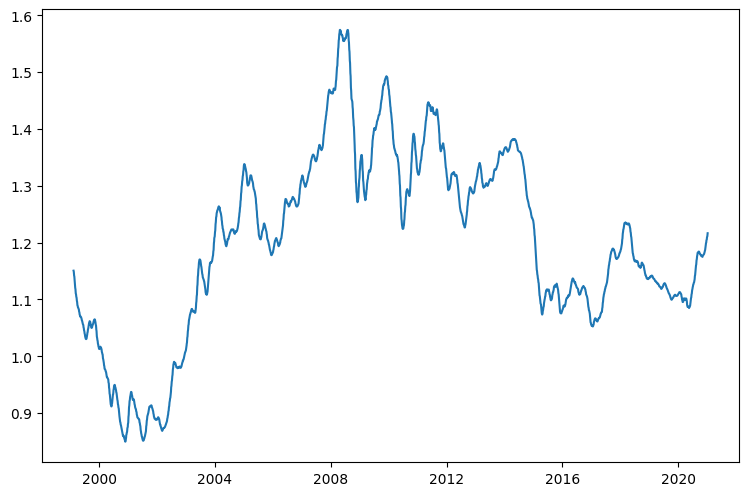

In [7]:
plt.figure(figsize=(9,6))
plt.plot(euro_to_dollar['Time'],
             euro_to_dollar['US dollar '].rolling(30).mean())

plt.show()

We show comparatively how the euro-dollar rate changed under the last three US presidents (George W. Bush (2001-2009), Barack Obama (2009-2017), and Donald Trump (2017-2021)). We can use a line plot.

In [17]:
bush_obama_trump = euro_to_dollar.copy(
                   )[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]
bush = bush_obama_trump.copy(
       )[bush_obama_trump['Time'].dt.year < 2009]
obama = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2009) & (bush_obama_trump['Time'].dt.year < 2017)]
trump = bush_obama_trump.copy(
       )[(bush_obama_trump['Time'].dt.year >= 2017) & (bush_obama_trump['Time'].dt.year < 2021)]

In [8]:
euro_to_dollar['rolling_mean']=euro_to_dollar['US dollar '].rolling(30).mean()

<ipython-input-8-da12b96b0a17>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [29]:
euro_to_dollar['rolling_mean'].isnull()

0        True
1        True
2        True
3        True
4        True
        ...  
5694    False
5695    False
5696    False
5697    False
5698    False
Name: rolling_mean, Length: 5637, dtype: bool

Text(0, 0.5, 'EUR/USD conversion rate')

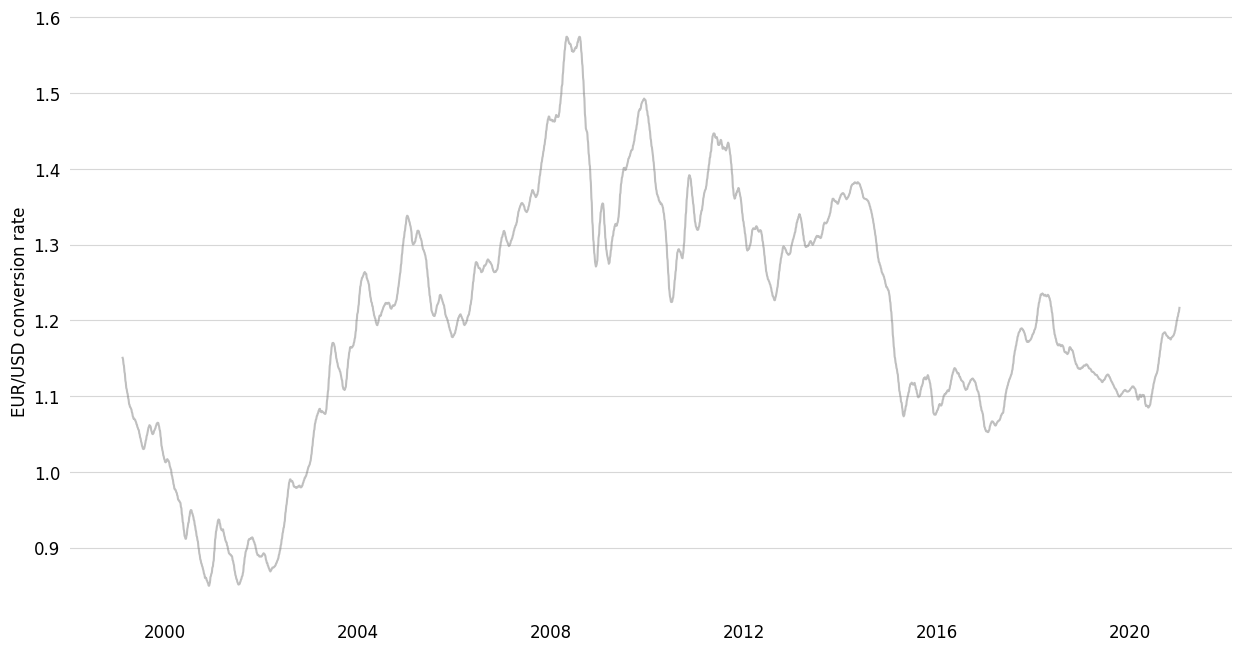

In [9]:
#Initiate the plot with the corresponding data
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean'],
        color='gray',
        alpha=.5)
#Remove all the four spines
for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)

#Hide ticks
ax.tick_params(bottom=False, left=False)

#Modify ticks labels
ax.tick_params(axis='x', color='black', which='major', labelsize=12, labelrotation=0)
ax.tick_params(axis='y', color='black', which='major', labelsize=12, labelrotation=0)
ax.grid(axis='y', visible=True, alpha=.5)
ax.set_ylabel('EUR/USD conversion rate', color='black', size=12)

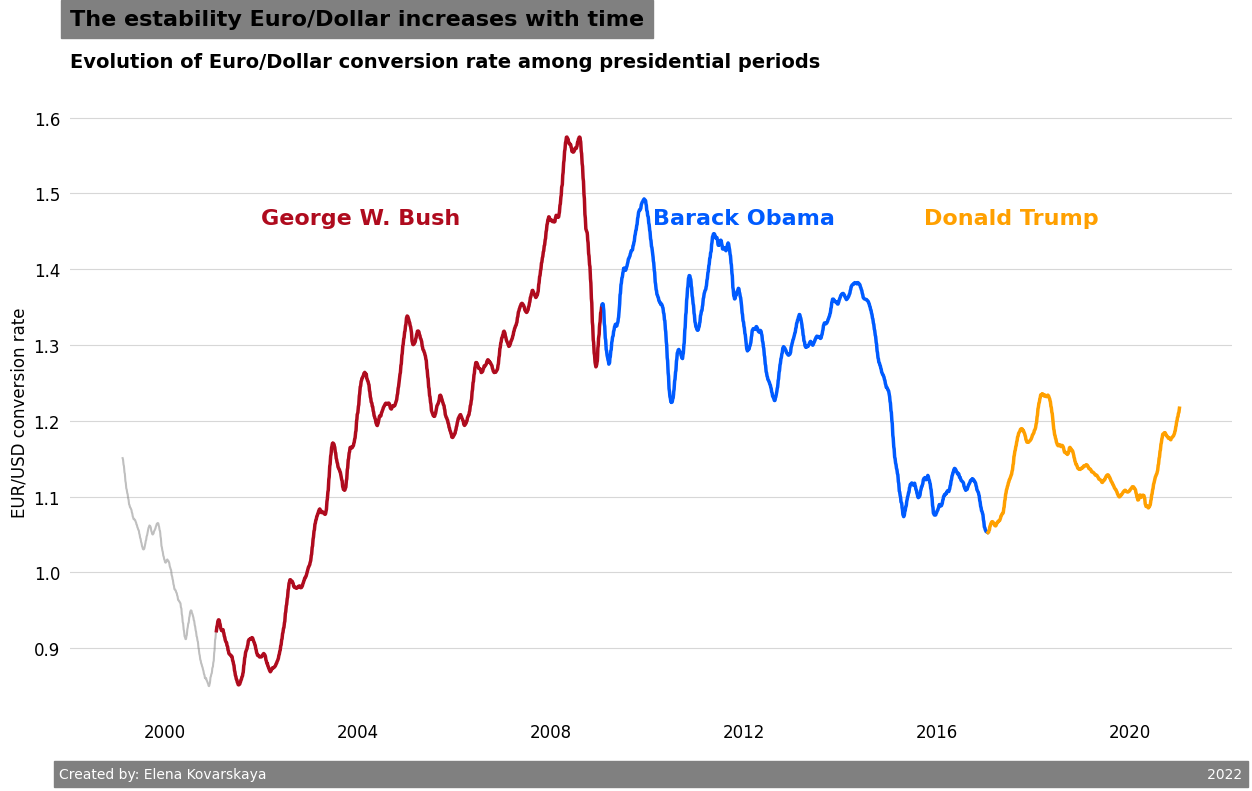

In [32]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.plot(euro_to_dollar['Time'],
        euro_to_dollar['rolling_mean'],
        color='gray',
        alpha=.5)
#Remove all the four spines
for location in ['top', 'bottom', 'left', 'right']:
    ax.spines[location].set_visible(False)

#Hide ticks
ax.tick_params(bottom=False, left=False)

#Modify ticks labels
ax.tick_params(axis='x', color='black', which='major', labelsize=12, labelrotation=0)
ax.tick_params(axis='y', color='black', which='major', labelsize=12, labelrotation=0)
ax.grid(axis='y', visible=True, alpha=.5)
ax.set_ylabel('EUR/USD conversion rate', color='black', size=12)

#Plot George W. Bush period (2001-01-20 – 2009-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2001,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2009,1,20))],
        euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2001,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2009,1,20))],
        color='#af0b1e', linewidth=2.5)

ax.text(.25,.82, 'George W. Bush',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        fontsize=16, color='#af0b1e', weight='bold')

#Plot Barack Obama period (2009-01-20 – 2017-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2009,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2017,1,20))],
        euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2009,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2017,1,20))],
        color='#005BFF', linewidth=2.5)

ax.text(.58,.82, 'Barack Obama',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        fontsize=16, color='#005BFF', weight='bold')

#Plot Donald Trump period (2017-01-20 – 2021-01-20) and label
ax.plot(euro_to_dollar['Time'][(euro_to_dollar['Time'] >= datetime.datetime(2017,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2021,1,20))],
        euro_to_dollar['rolling_mean'][(euro_to_dollar['Time'] >= datetime.datetime(2017,1,20)) & (euro_to_dollar['Time'] < datetime.datetime(2021,1,20))],
        color='#FFA000', linewidth=2.5)

ax.text(.81,.82, 'Donald Trump',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        fontsize=16, color='#FFA000', weight='bold')
#Title and subtitle
ax.text(0, 1.15, 'The estability Euro/Dollar increases with time',
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         color='black',
         backgroundcolor='gray',
         size=16, weight='bold')

ax.text(0, 1.08, 'Evolution of Euro/Dollar conversion rate among presidential periods',
         horizontalalignment='left',
         verticalalignment='center',
         transform=ax.transAxes,
         color='black',
         size=14, weight='bold')

#Signature line
ax.text(0.5, -0.1, 'Created by: Elena Kovarskaya' + ' ' * 215 + '2022',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes,
        color='white',
        backgroundcolor='gray')

plt.show()